# Data Pre-Processing and Visualization
This notebook takes RGB images from EuroSat Satellite mission and converts them into numpy arrays with corresponding label arrays and stores them into .npy files (images.csv.npy & labels.csv.npy for corresponding images and labels)
Dataset Download link :

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
print(check_output(["ls", "2750"]).decode("utf8"))

AnnualCrop
Forest
HerbaceousVegetation
Highway
Industrial
Pasture
PermanentCrop
Residential
River
SeaLake



# Visualizing the loaded images

Working with 24500 images
Image examples: 
River_579.jpg


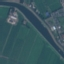

SeaLake_765.jpg


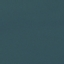

In [5]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

folder = "2750/AnnualCrop"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

In [6]:
from PIL import Image

im = Image.open('2750/AnnualCrop/AnnualCrop_393.jpg')
width, height = im.size
print(width,height)

(64, 64)


# Converting all the images to numpy arrays

In [7]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append(_file[0:label_in_file])
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 64
image_height = 64
ratio = 1

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((64, 64, 3))
    # Normalize
    x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Files in train_files: 24500
250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
5250 images to array
5500 images to array
5750 images to array
6000 images to array
6250 images to array
6500 images to array
6750 images to array
7000 images to array
7250 images to array
7500 images to array
7750 images to array
8000 images to array
8250 images to array
8500 images to array
8750 images to array
9000 images to array
9250 images to array
9500 images to array
9750 images to array
10000 images to array
10250 images to array
10500 images to array
10750 images to array
11000 images to array
11250 images to array
11500 images to array
11

In [8]:
#saving to .npy file
np.save('images.csv', dataset)


# Fetching all the labels

In [9]:
y_train

['River',
 'AnnualCrop',
 'Pasture',
 'Forest',
 'HerbaceousVegetation',
 'Forest',
 'AnnualCrop',
 'Forest',
 'SeaLake',
 'Residential',
 'Residential',
 'HerbaceousVegetation',
 'Industrial',
 'River',
 'Residential',
 'Residential',
 'Residential',
 'AnnualCrop',
 'Industrial',
 'Residential',
 'SeaLake',
 'SeaLake',
 'HerbaceousVegetation',
 'Highway',
 'Pasture',
 'SeaLake',
 'Residential',
 'Residential',
 'Residential',
 'Forest',
 'Pasture',
 'River',
 'Forest',
 'Residential',
 'Forest',
 'River',
 'Residential',
 'Industrial',
 'Residential',
 'Residential',
 'River',
 'SeaLake',
 'Forest',
 'HerbaceousVegetation',
 'AnnualCrop',
 'Forest',
 'Industrial',
 'Residential',
 'River',
 'Forest',
 'Pasture',
 'Industrial',
 'AnnualCrop',
 'Industrial',
 'Highway',
 'Industrial',
 'HerbaceousVegetation',
 'Forest',
 'SeaLake',
 'HerbaceousVegetation',
 'Residential',
 'Highway',
 'SeaLake',
 'Pasture',
 'Highway',
 'River',
 'Industrial',
 'SeaLake',
 'SeaLake',
 'SeaLake',
 'Fores

# Saving the labels labels

In [12]:
np.save('labels.csv', y_train)


In [13]:
dataset

array([[[[-0.578125 , -0.296875 , -0.296875 ],
         [-0.578125 , -0.3046875, -0.2734375],
         [-0.5625   , -0.2890625, -0.2578125],
         ...,
         [-0.4609375, -0.234375 , -0.203125 ],
         [-0.4140625, -0.1484375, -0.140625 ],
         [-0.4140625, -0.1328125, -0.1484375]],

        [[-0.5859375, -0.2890625, -0.265625 ],
         [-0.6015625, -0.296875 , -0.2578125],
         [-0.5859375, -0.28125  , -0.2421875],
         ...,
         [-0.4375   , -0.2421875, -0.203125 ],
         [-0.3984375, -0.15625  , -0.140625 ],
         [-0.4140625, -0.1328125, -0.1640625]],

        [[-0.6015625, -0.296875 , -0.2421875],
         [-0.6015625, -0.296875 , -0.2421875],
         [-0.625    , -0.3046875, -0.2578125],
         ...,
         [-0.3359375, -0.203125 , -0.140625 ],
         [-0.34375  , -0.140625 , -0.1328125],
         [-0.4140625, -0.1328125, -0.1640625]],

        ...,

        [[-0.3984375, -0.140625 , -0.0859375],
         [-0.390625 , -0.15625  , -0.078125 ]

In [14]:
y_train

[8,
 0,
 5,
 1,
 2,
 1,
 0,
 1,
 9,
 7,
 7,
 2,
 4,
 8,
 7,
 7,
 7,
 0,
 4,
 7,
 9,
 9,
 2,
 3,
 5,
 9,
 7,
 7,
 7,
 1,
 5,
 8,
 1,
 7,
 1,
 8,
 7,
 4,
 7,
 7,
 8,
 9,
 1,
 2,
 0,
 1,
 4,
 7,
 8,
 1,
 5,
 4,
 0,
 4,
 3,
 4,
 2,
 1,
 9,
 2,
 7,
 3,
 9,
 5,
 3,
 8,
 4,
 9,
 9,
 9,
 1,
 2,
 4,
 2,
 7,
 3,
 2,
 1,
 4,
 8,
 1,
 9,
 4,
 2,
 8,
 1,
 8,
 1,
 8,
 4,
 9,
 7,
 5,
 4,
 2,
 8,
 3,
 4,
 1,
 0,
 3,
 9,
 0,
 1,
 4,
 9,
 1,
 0,
 4,
 5,
 2,
 0,
 1,
 0,
 9,
 3,
 4,
 1,
 3,
 1,
 0,
 3,
 9,
 8,
 2,
 5,
 7,
 8,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 0,
 1,
 8,
 5,
 8,
 0,
 8,
 3,
 2,
 5,
 9,
 9,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 3,
 4,
 2,
 2,
 1,
 1,
 4,
 1,
 9,
 8,
 4,
 5,
 9,
 2,
 2,
 1,
 9,
 8,
 3,
 3,
 5,
 2,
 3,
 9,
 9,
 5,
 0,
 8,
 7,
 9,
 2,
 3,
 0,
 1,
 2,
 0,
 1,
 4,
 4,
 7,
 7,
 9,
 5,
 3,
 0,
 7,
 3,
 7,
 9,
 7,
 4,
 5,
 8,
 0,
 2,
 3,
 5,
 9,
 7,
 9,
 7,
 1,
 8,
 8,
 3,
 2,
 3,
 8,
 1,
 1,
 2,
 5,
 5,
 0,
 4,
 9,
 0,
 7,
 8,
 7,
 7,
 2,
 3,
 2,
 9,
 1,
 4,
 7,
 8,
 3,
 9,
 8,
 0,
 4,
 1,


In [22]:
X_train[0]

array([[[-0.265625 , -0.1796875, -0.2109375],
        [-0.2421875, -0.1953125, -0.2109375],
        [ 0.       , -0.0625   , -0.078125 ],
        ...,
        [ 0.1640625,  0.0078125,  0.0234375],
        [ 0.       , -0.15625  , -0.0859375],
        [ 0.015625 , -0.1484375,  0.       ]],

       [[-0.296875 , -0.171875 , -0.1796875],
        [-0.296875 , -0.1875   , -0.1796875],
        [-0.0546875, -0.046875 , -0.03125  ],
        ...,
        [ 0.1328125,  0.015625 ,  0.0546875],
        [-0.0546875, -0.1328125, -0.0625   ],
        [-0.0625   , -0.1171875,  0.0078125]],

       [[-0.46875  , -0.3203125, -0.2890625],
        [-0.4609375, -0.328125 , -0.2734375],
        [-0.3203125, -0.25     , -0.2109375],
        ...,
        [ 0.125    ,  0.0234375,  0.078125 ],
        [-0.03125  , -0.0703125, -0.015625 ],
        [-0.0859375, -0.0625   ,  0.0078125]],

       ...,

       [[ 0.7109375,  0.53125  ,  0.40625  ],
        [ 0.734375 ,  0.53125  ,  0.4296875],
        [ 0.625    ,  

In [23]:
y_train[0]

7

The data has been processed and put into a .npy file, waiting for it to be processed and made into a prediction model